PROJETO 1 - TURING ACADEMY

In [182]:
#importação das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#importando o dataframe
df = pd.read_csv("df_athlete_events.csv")

In [12]:
df.head()

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN
2,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
3,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
4,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze


In [14]:
#indexação do ID
df.set_index("Athlete_ID", inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45567 entries, 4 to 135563
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    45567 non-null  object 
 1   Sex     45567 non-null  object 
 2   Age     44594 non-null  float64
 3   Height  35547 non-null  float64
 4   Weight  34926 non-null  object 
 5   Team    45567 non-null  object 
 6   NOC     45567 non-null  object 
 7   Games   45567 non-null  object 
 8   Year    45567 non-null  int64  
 9   Season  45567 non-null  object 
 10  City    45567 non-null  object 
 11  Sport   45567 non-null  object 
 12  Event   45567 non-null  object 
 13  Medal   39804 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 5.2+ MB


Notamos que:
1) Age está como float (deve ser int);
2) Weight está como object (deve ser float);
3) Dados faltantes para Age, Height, Weight e Medal;
4) Sex - problema com unique values (M/Male e F/Female);


In [55]:
#Vamos dar uma conferida melhor na categoria Sex
print(pd.Series(df["Sex"].unique()), end='\n\n') #categoria atualizada com as alterações em M e F

0                       MALE
1                     FEMALE
2    Vic vai te dar um socao
3          P&D >> Comunidade
dtype: object



Podemos perceber que, para Sex, são atribuídos 6 valores únicos, o que indica que foram consideradas 6 possibilidades de sexo.
Dentre elas, podemos destacar algumas bem curiosas: 'Vic vai te dar um socao' e 'P&D >> Comunidade'. Sabemos que isso não condiz com a realidade, em especial a última.
Vamos, então, considerar apenas as opções 'MALE' e 'FEMALAE'.

In [53]:
# Troca "M" por "MALE"
df["Sex"].replace("M", "MALE", inplace=True)

# Troca "F" e "FEMALE"
df["Sex"].replace("F", "FEMALE", inplace=True)

In [59]:
#Vamos analisar o perfil dos atletas cujo sexo é Vic vai te dar um socao
df[df["Sex"] == "Vic vai te dar um socao"]

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
Athlete_ID,,,,,,,,,,,,,,
30,Pepijn Aardewijn,Vic vai te dar um socao,26.0,189.0,72.0,Netherlands,NED,1996 Summer,-765,Summer,Atlanta,Rowing,Rowing Men's Lightweight Double Sculls,Silver
562,Pawe Abratkiewicz,Vic vai te dar um socao,27.0,183.0,84.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Speed Skating,Speed Skating Men's 500 metres,NaN
963,Derrick Ralph Adkins,Vic vai te dar um socao,26.0,188.0,80.0,United States,USA,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Men's 400 metres Hurdles,Gold
1435,Janne Petteri Ahonen,Vic vai te dar um socao,28.0,184.0,66.0,Finland,FIN,2006 Winter,2006,Winter,Torino,Ski Jumping,"Ski Jumping Men's Large Hill, Team",Silver
1555,Geard Ajetovi,Vic vai te dar um socao,19.0,170.0,67.0,Serbia and Montenegro,SCG,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Welterweight,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132195,Yury Aleksandrovich Yakimov,Vic vai te dar um socao,23.0,186.0,80.0,Soviet Union,URS,1976 Summer,1976,Summer,Montreal,Rowing,Rowing Men's Quadruple Sculls,Silver
132638,Dmitry Semyonovich Yaparov,Vic vai te dar um socao,28.0,186.0,86.0,Russia,RUS,2014 Winter,2014,Winter,Sochi,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,Silver
133136,Yoshikatsu Yoshida,Vic vai te dar um socao,22.0,161.0,56.0,Japan,JPN,1964 Summer,1964,Summer,Tokyo,Wrestling,"Wrestling Men's Flyweight, Freestyle",Gold


In [77]:
#Vamos nos atentar à categoria Events dos atletas que possuem o sexo Vic vai te dar um socao
pd.Series(df[df["Sex"] == "Vic vai te dar um socao"]["Event"])

Athlete_ID
30                   Rowing Men's Lightweight Double Sculls
562                          Speed Skating Men's 500 metres
963                      Athletics Men's 400 metres Hurdles
1435                     Ski Jumping Men's Large Hill, Team
1555                              Boxing Men's Welterweight
                                ...                        
132195                        Rowing Men's Quadruple Sculls
132638    Cross Country Skiing Men's 4 x 10 kilometres R...
133136                 Wrestling Men's Flyweight, Freestyle
133512                           Athletics Men's Pole Vault
133933                              Football Men's Football
Name: Event, Length: 312, dtype: object

Perceba um padrão: a maioria dos atletas que a série nos mostra jogaram em eventos masculinos. Sabemos disso pois todos os eventos contém a palavra "Men's". 
É importante ressaltar que são 312 atletas que possuem o sexo Vic vai te dar um socao.
Vamos garantir que todos eles são, de fato, homens?

In [78]:
#Contagem de quantos dos eventos cujos atletas posseum o sexo Vic vai te dar um socao contêm a palavra "Men's"
pd.Series(df[df["Sex"] == "Vic vai te dar um socao"]["Event"].str.contains("Men's")).count()

312

Match total! Agora sim temos a certeza de que todos esses atletas são, na verdade, do sexo MALE e não do sexo Vic vai te dar um socao. Vamos fazer a troca correta?

In [79]:
# Troca "Vic vai te dar um socao" por "MALE"
df["Sex"].replace("Vic vai te dar um socao", "MALE", inplace=True)

In [80]:
print(pd.Series(df["Sex"].unique()), end='\n\n')

0                 MALE
1               FEMALE
2    P&D >> Comunidade
dtype: object



In [81]:
#Vamos analisar o perfil dos atletas cujo sexo é P&D >> Comunidade
df[df["Sex"] == "P&D >> Comunidade"]

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
Athlete_ID,,,,,,,,,,,,,,
1467,Mara Magdalena Aicega Amicarelli,P&D >> Comunidade,34.0,165.0,60.0,Argentina,ARG,2008 Summer,2008,Summer,Beijing,Hockey,Hockey Women's Hockey,Bronze
1546,Eirini Andili,P&D >> Comunidade,17.0,167.0,45.0,Greece,GRE,2000 Summer,2000,Summer,Sydney,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Group,Bronze
1639,Albina Khamitovna Akhatova,P&D >> Comunidade,29.0,160.0,55.0,Russia,RUS,2006 Winter,2006,Winter,Torino,Biathlon,Biathlon Women's 4 x 6 kilometres Relay,Gold
2210,Marina Alabau Neira,P&D >> Comunidade,26.0,164.0,55.0,Spain,ESP,2012 Summer,2012,Summer,London,Sailing,Sailing Women's Windsurfer,Gold
2464,Jo Qesem Ayela Aleh,P&D >> Comunidade,30.0,171.0,58.0,New Zealand,NZL,2016 Summer,2016,Summer,Rio de Janeiro,Sailing,Sailing Women's Two Person Dinghy,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133635,"Claudia Hildegard Zaczkiewicz (Reidick-, -Reid...",P&D >> Comunidade,26.0,170.0,57.0,West Germany,FRG,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 100 metres Hurdles,Bronze
134077,Nataliya Borisovna Zasulskaya,P&D >> Comunidade,23.0,190.0,95.0,Unified Team,EUN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Women's Basketball,Gold
134294,Martina Zellner (-Seidl),P&D >> Comunidade,23.0,169.0,62.0,Germany,GER,1998 Winter,1998,Winter,Nagano,Biathlon,Biathlon Women's 4 x 7.5 kilometres Relay,Gold


Veja o padrão: repete-se a palavra "Women's" em Event para esses atletas. Vamos confirmar nosso palpite de forma análoga ao que fizemos anteriormente:

In [93]:
#Contagem de quantos eventos cujos  atletas possuem o sexo P&D >> Comunidade
pd.Series(df[df["Sex"] == "P&D >> Comunidade"]["Event"]).count()


333

In [92]:
#Contagem de quantos dos eventos cujos atletas posseum o sexo P&D >> Comunidade contêm a palavra "Women's"
pd.Series(df[df["Sex"] == "P&D >> Comunidade"]["Event"].str.contains("Women's")).count()

333

Isso prova por A + B que P&D não é maior que Comunidade e que o sexo que estamos investigando, nesse caso, é FEMALE. Vamos aos ajustes?

In [94]:
# Troca "P&D >> Comunidade" por "FEMALE"
df["Sex"].replace("P&D >> Comunidade", "FEMALE", inplace=True)

In [98]:
print(pd.Series(df["Sex"].unique()), end='\n\n')

0      MALE
1    FEMALE
dtype: object



In [115]:
df.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
Athlete_ID,,,,,,,,,,,,,,
4,Edgar Lindenau Aabye,MALE,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
6,Per Knut Aaland,MALE,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN
15,Arvo Ossian Aaltonen,MALE,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
15,Arvo Ossian Aaltonen,MALE,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
16,Juhamatti Tapio Aaltonen,MALE,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze


Vamos investigar os dados faltantes!

In [120]:
print(pd.Series(df["Medal"].unique()), end = "\n\n")

0      Gold
1       NaN
2    Bronze
3    Silver
4    Nelson
dtype: object



Geralmente, as medalhas são Gold, Silver ou Bronze. Nelson é um pouco estranho, não? Vamos tratar esse caso e os valores inválidos.

In [135]:
df["Medal"].describe()

count     39804
unique        4
top        Gold
freq      13320
Name: Medal, dtype: object

In [143]:
df.groupby("Medal").count()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event
Medal,,,,,,,,,,,,,
Bronze,13255,13255,12966,10328,10203,13255,13255,13255,13255,13255,13255,13255,13255
Gold,13320,13320,13172,10491,10215,13320,13320,13320,13320,13320,13320,13320,13320
Nelson,166,166,166,153,151,166,166,166,166,166,166,166,166
Silver,13063,13063,12768,10118,9939,13063,13063,13063,13063,13063,13063,13063,13063


Veja que Gold é a medalha que mais se repete.

Nelson, por outro lado, é a que menos se repete e sua participação no grupo total de medalhas é ínfima (166 medalhas de 39804), representando menos de 0.5% das medalhas.

Uma maneira de atacar esse problema é: Nelson representa medalhas reais, que foram atribuídas a atletas reais. É provável que Nelson seja uma medalha Gold, Silver ou Bronze, mas que, por algum erro, tenha sido digitada de forma incorreta. 

Para alterar Nelson, é razoável considerarmos o valor que mais se repete (moda): Gold.

In [149]:
#Troca Nelson por Gold

df["Medal"].replace("Nelson", df["Medal"].mode()[0], inplace = True)

In [150]:
df["Medal"].isnull().sum()

5763

De forma semelhante, podemos substituir os valores nulos pela moda.

In [156]:
df["Medal"].fillna(df["Medal"].mode()[0], inplace = True)


In [161]:
df["Medal"].isnull().sum()

0

In [166]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,44594.0,25.851348,5.966053,10.0,22.0,25.0,29.0,73.0
Height,35547.0,972.993867,34467.807030,132.0,170.0,178.0,185.0,1976779.0
Year,45567.0,1972.391094,94.200678,-2992.0,1952.0,1984.0,2002.0,2016.0


Para Year, destaca-se o valor mínimo negativo. Não faz sentido um ano ser negativo. Mas, antes de mais nada, vamos entender qual o papel deles no nosso dataset.

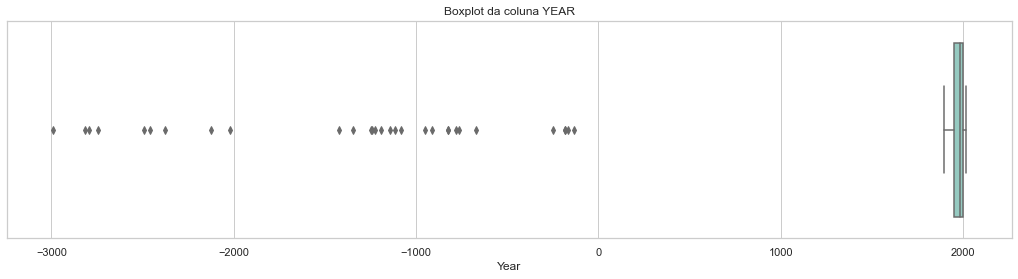

In [207]:
#Vamos plotar um gráfico que ilustre a situação dos valores negativos atribuídos ao ano
plt.figure(figsize=(18,4))
sns.boxplot(x = df["Year"], palette = "Set3")
plt.title("Boxplot da coluna YEAR")
plt.show()

O gráfico acima nos mostra muito bem que esses valores negativos são outliers e, nesse caso, podemos ver que também distorcem os valores das idades. Para resolver isso, vamos descartar esses valores.

In [218]:
#Descartando os outliers
df = df[df["Year"] > 0]

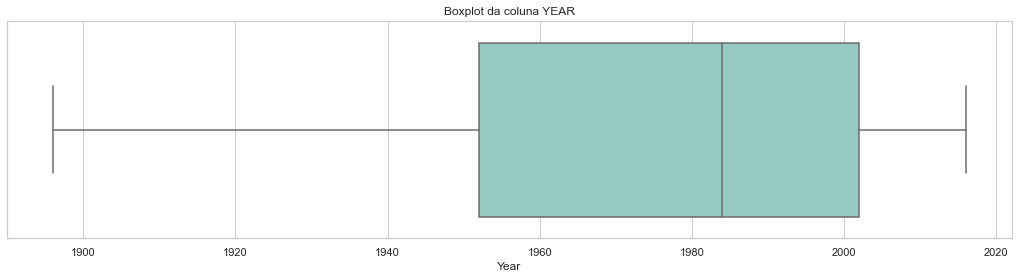

In [220]:
#Novo gráfico boxplot
plt.figure(figsize=(18,4))
sns.boxplot(x = df["Year"], palette = "Set3")
plt.title("Boxplot da coluna YEAR")
plt.show()

Acabamos nosso tratamento de dados em Year. Vamos para Age. Do describe anterior, não pudemos identificar nenhum problema. Vamos ver se há valores nulos, então.

In [233]:
df["Age"].isnull().sum()

971

Vamos substituir os valores faltantes para Age. Mas pelo quê? Utilizar a mediana dos valores, nesse caso, é uma solução razoável. Vamos a ela!

In [257]:
df["Age"].fillna(df["Age"].median())

Athlete_ID
4         34.0
6         31.0
15        30.0
15        30.0
16        28.0
          ... 
135553    25.0
135553    33.0
135554    28.0
135563    19.0
135563    23.0
Name: Age, Length: 45537, dtype: float64

In [256]:
df["Age"].isnull().sum()

0

Vamos tratar da coluna Height. 

Consideremos que o maior atleta do mundo tem 2,46m de altura. 

Veja, abaixo, que dentro desse intervalo, a altura maior é 2.23m. É razoável, portanto, que a tomemos como o limite das alturas dos nossos atletas, pois é o máximo valor menor ou igual a real altura máxima de um atleta.

Qualquer valor acima disso, deverá ser reajustado corretamente.

In [306]:
df[df["Height"] <= 246]["Height"].max()


223.0

In [312]:
#Contagem da quantidade de alturas maiores que a altura máxima 246cm
df.groupby(df["Height"] > 246).count()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
Height,,,,,,,,,,,,,,
False,45513,45513,45513,35500,34879,45513,45513,45513,45513,45513,45513,45513,45513,45513
True,24,24,24,24,24,24,24,24,24,24,24,24,24,24


In [313]:
#Contagem da quantidade de alturas com dados nulos
df["Height"].isnull().sum()

10013

Vamos tratar os casos nulos e excedentes das nossas alturas!

Agora, tratemos a coluna Weight. Como visto anteriormente, precisamos transformá-la em float.

Mas antes disso, vejamos abaixo que, dentre os valores possíveis, há uma string: 'hsuahusahu'.

Primeiro, ela deve ser transformada em um número e, após isso, podemos alterar o tipo da nosssa.

In [316]:
df["Weight"].describe()

count     34903
unique      188
top        70.0
freq       1439
Name: Weight, dtype: object

In [317]:
df["Weight"].unique()

array([nan, '75.0', '85.0', '64.0', '90.0', '87.0', '49.0', 'hsuahusahu',
       '76.0', '83.0', '86.0', '82.0', '55.0', '67.0', '60.0', '79.0',
       '96.0', '97.0', '70.0', '88.0', '56.0', '80.0', '59.0', '91.0',
       '72.0', '62.0', '63.0', '130.0', '104.0', '73.0', '84.0', '125.0',
       '50.0', '102.0', '48.0', '58.0', '78.0', '40.0', '68.0', '92.0',
       '61.0', '95.0', '89.0', '65.0', '93.0', '77.0', '46.0', '81.0',
       '52.0', '54.0', '57.0', '69.0', '99.0', '69.5', '51.0', '120.0',
       '74.0', '110.0', '100.0', '66.0', '47.0', '116.0', '107.0', '53.0',
       '45.0', '105.0', '109.0', '156.0', '71.0', '98.0', '160.0',
       '106.0', '146.0', '44.0', '138.0', '141.0', '94.0', '118.0',
       '101.0', '39.0', '32.0', '112.0', '115.0', '74.5', '121.0',
       '135.0', '111.0', '43.0', '36.0', '67.5', '114.0', '132.0', '65.5',
       '42.0', '59.5', '127.5', '108.0', '35.0', '117.0', '103.0', '58.5',
       '214.0', '113.0', '146.5', '116.5', '140.0', '38.0', '101.5',